In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Zero Pole Filter

In [2]:
SAMPLE_RATE = 1000  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [3]:
# Zeros and poles to make filter
z = [1]
p = [0]  
k=1

In [4]:
# zero pole filter
# w is frequencies normalized to the range [0, pi) 
# h is frequency response
w, h = signal.freqz_zpk(z, p, k )

In [5]:
# calculating magnitude and phase response
magnitude = 20 * np.log10(abs(h))
angles = np.unwrap(np.angle(h))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23928\1242605857.py:2: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


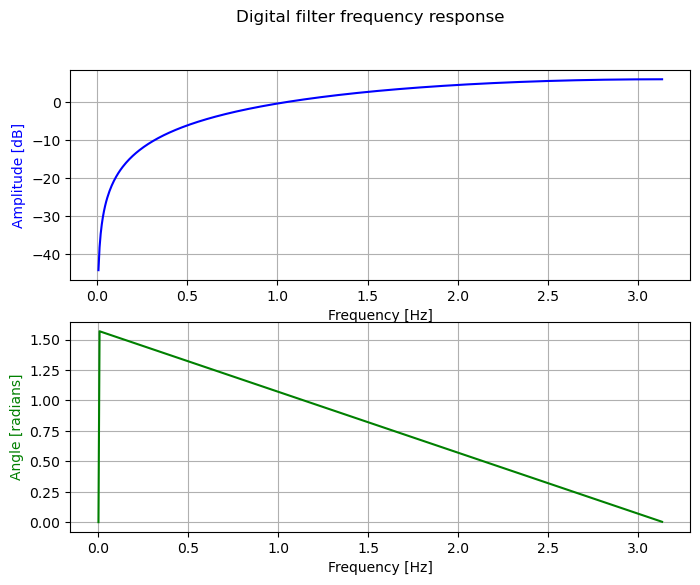

In [6]:
# magnitude and phase response plot
fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(8, 6))
fig.suptitle('Digital filter frequency response')

# ax1.set_title('Digital filter frequency response')
ax1.plot(w, magnitude, 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(True)

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle [radians]', color='g')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid(True)
plt.show()

## All pass filter

In [7]:
a = 2
p = a
z = 1/np.conj(a)

In [8]:
a = [0.5]
p=a
z =[1/np.conj(x) for x in a]

In [9]:
print(p)
print(z)

[0.5]
[2.0]


In [10]:
b , a = signal.zpk2tf(z,p,1)

In [11]:
print(b)
print(a)

[ 1. -2.]
[ 1.  -0.5]


In [12]:
w, h = signal.freqz_zpk(z, p, k )
magnitude = 20 * np.log10(abs(h))
# magnitude = abs(h)
angles = np.unwrap(np.angle(h))

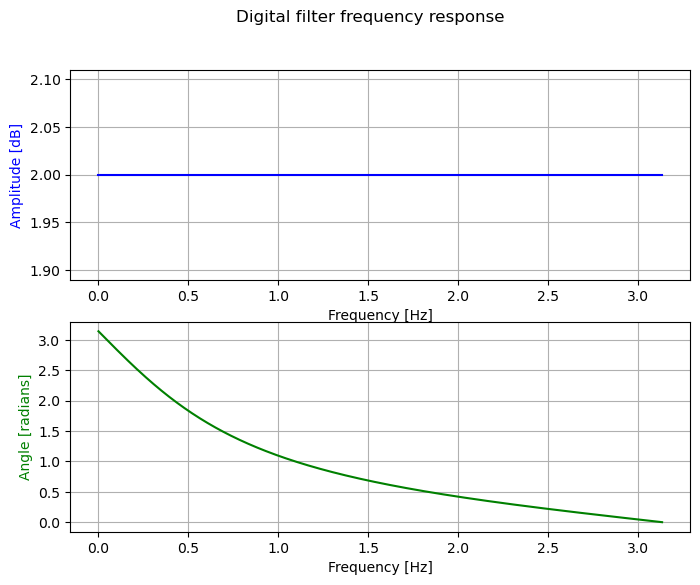

In [13]:
# magnitude and phase response plot
fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(8, 6))
fig.suptitle('Digital filter frequency response')

# ax1.set_title('Digital filter frequency response')
ax1.plot(w, abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(True)

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle [radians]', color='g')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid(True)
plt.show()

## Filtered signal

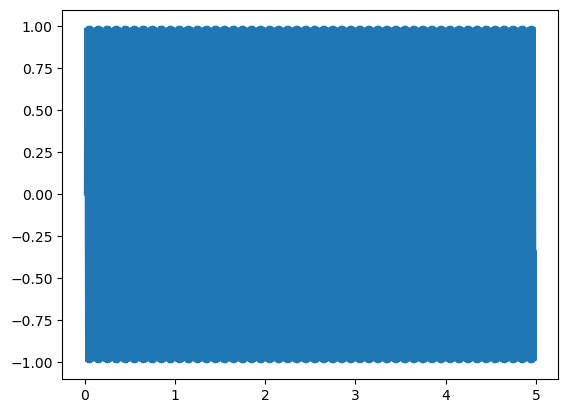

In [14]:
# Generate a 2 hertz sine wave that lasts for 5 seconds
t, amp = generate_sine_wave(55, SAMPLE_RATE, DURATION)
plt.plot(t, amp)
plt.show()

In [15]:
z = [1]
p = [0] 

In [16]:
# filter coefficients
# polynomial transfer function representation from zeros and poles
b , a = signal.zpk2tf(z,p,1)

In [17]:
# apply filter by difference equation on signal
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, amp, zi=zi*amp[0])
y = signal.lfilter(b, a, amp)

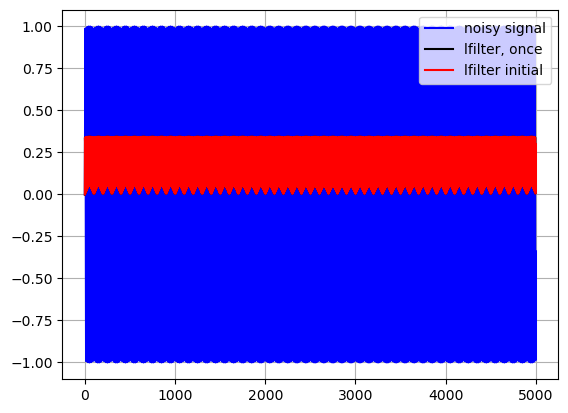

In [18]:
plt.figure
plt.plot( amp, 'b')
plt.plot( abs(y), 'k',abs(z),"r")
plt.legend(('noisy signal', 'lfilter, once' , 'lfilter initial'), loc='best')
plt.grid(True)
plt.show()

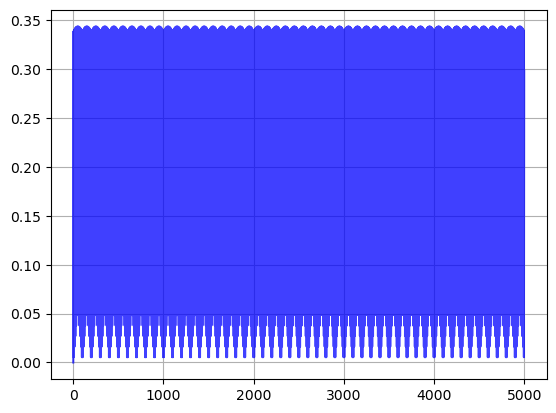

In [19]:
plt.plot( abs(z), 'b', alpha=0.75)
plt.grid(True)
plt.show()